**Creation of simulated dataset of climate variables, based on Phoenix Park, Dublin weather station**   
As explained in the README file for this repository, this notebook aims to generate simulated data, based on analysis of government provided actual readings, for rainfall, atmospheric pressure, and minimum and maximum temperatures on a daily basis from the Phoenix Park weather station.  

Climate predictions are of highly significant importance with concerns about human induced global warming.  

The actual historical data was downloaded from the government website into an Excel spreadsheet, and then exported to a csv file. The non-data header rows, plus columns for variables that are not being examined have been removed from the file, along with incomplete rows of data.  

The pandas, matplotlib and scipy packages are imported for processing the input data, and numpy is used to generate random, simulated data.  

The csv file is first loaded into a Pandas dataframe, and we get the data type for each column :  
(ref https://www.shanelynn.ie/python-pandas-read_csv-load-data-from-csv-files/)  
(ref https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
df = pd.read_csv('Phoenix Park weather data.csv')
print (df.dtypes)

date      object
maxtp    float64
mintp    float64
rain     float64
cbl      float64
dtype: object


'cbl' is the 'convective boundary layer' - the layer of the earth's atmosphere most affected by the heating effect of the sun on the earth's surface. So the 'cbl' column here, which is for a ground based weather station, is the atmospheric pressure at ground level.  
(ref https://en.wikipedia.org/wiki/Convective_planetary_boundary_layer)

Display the first few rows from the spreadsheet and count the number of rows :  
(ref https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/)    
(ref https://stackoverflow.com/questions/15943769/how-do-i-get-the-row-count-of-a-pandas-dataframe)

In [7]:
print(df.iloc[0:12],0)
print(' ')
print('Number of rows ' , len(df.index))

         date  maxtp  mintp  rain     cbl
0   01-Jan-06    8.2    2.9   0.0  1002.8
1   02-Jan-06   10.6    0.7   0.0  1016.5
2   03-Jan-06   10.9    0.0   0.2  1020.5
3   04-Jan-06    7.2   -1.6   0.0  1022.5
4   05-Jan-06    6.4    4.1   0.0  1014.6
5   06-Jan-06    5.1    1.1   0.0  1015.6
6   07-Jan-06    4.7    1.7   0.0  1017.9
7   08-Jan-06    5.9   -2.7   1.3  1019.2
8   09-Jan-06   10.5   -4.2   0.0  1014.5
9   10-Jan-06   12.9    8.0   9.6  1002.3
10  11-Jan-06    9.0    4.1   0.3  1007.6
11  12-Jan-06   12.5    4.6   0.0  1011.6 0
 
Number of rows  4742


There are many data rows, so make sure programatically that none of them contain null values - as this would affect the statistical values such as 'mean' that will be used to create the simulated data.  
(ref https://stackoverflow.com/questions/43424199/display-rows-with-one-or-more-nan-values-in-pandas-dataframe)

In [10]:
#print(df.iloc[0])
for col in df.columns: 
    print(col)

date
maxtp
mintp
rain
cbl


Break down the actual data by month, so we can build up our simulated data on a monthly basis. Extract the data for each month into a separate dataframe, to make it easy to plot and analyse at this scale :  
(ref https://stackoverflow.com/questions/27975069/how-to-filter-rows-containing-a-string-pattern-from-a-pandas-dataframe)

In [ ]:
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
mx={}
i=0
for mon in months:
    mx[i]=df[df['date'].str.contains(mon)]
    i+=1
    

Analysis of Irish climate records by a team at Maynooth university on behalf of the Environmental Protection Agency demonstrate that a Gamma probability distribution may be used to model winter and summer precipitation levels, and a Normal distribution for summer temperatures.  
http://www.epa.ie/pubs/reports/research/climate/Reserach_Report_277.pdf

Plot histograms for each month for each of the variables 'Max Temp', 'Min Temp', 'Rain' and 'Cbl' (pressure), to get an idea of what their distributions look like for this dataset. Use tight_layout so the title and axes labels don't overlap. Start with Max Temp:   
(ref https://stackoverflow.com/questions/47467077/python-plot-multiple-histograms)  
(ref https://matplotlib.org/users/tight_layout_guide.html)

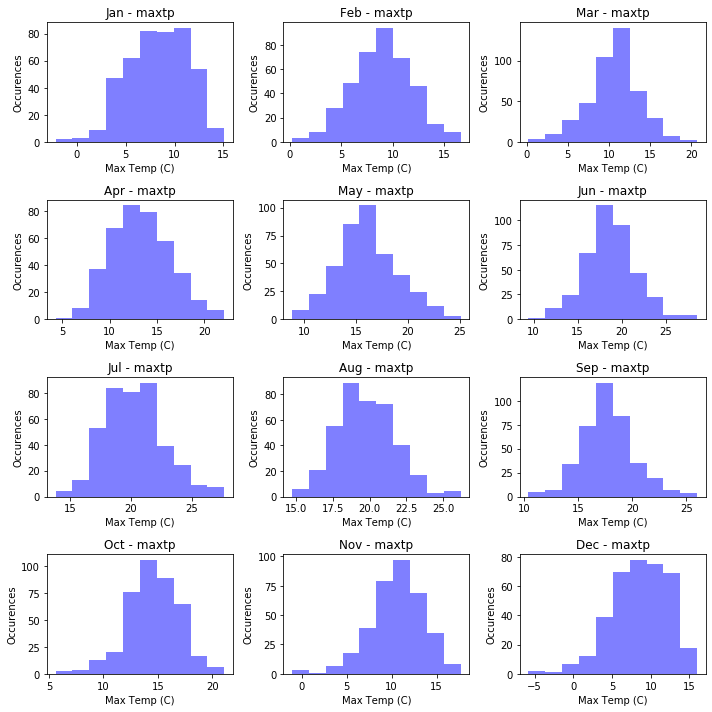

In [36]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(10, 10))
i = 0
for i1 in range(4):
    for i2 in range(3):
        ax = axes[i1][i2]
        ax.hist(mx[i]['maxtp'], bins=10, color='blue', alpha=0.5)
        ax.set_xlabel('Max Temp (C)')
        ax.set_title(months[i] + " - maxtp")
        ax.set_ylabel('Occurences')
        i+= 1

plt.tight_layout()
plt.show()

#plt.hist(np.random.gamma(0.3,5,395))

It looks like the data for some months has a Normal distribution, but perhaps not for other months, eg December which is skewed to the right. Use a statistical test to check for Normality - the Shapiro-Wilks test. Put which ones are Normal into 'norm', and the others into 'nonnorm'.  
(ref https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/)

In [83]:
from scipy.stats import shapiro
i=0
norm=[]
nonnorm=[]
for i in range(12):
    stat, p = shapiro(mx[i]['maxtp'])
    alpha = 0.05
    if p > alpha:
        print(months[i], " 'maxtp' - sample looks Normal")
        norm.append(i)
    else:
        print(months[i], " 'maxtp' - sample does not look Normal")
        nonnorm.append(i)
    i+=1 

Jan  'maxtp' - sample does not look Normal
Feb  'maxtp' - sample looks Normal
Mar  'maxtp' - sample does not look Normal
Apr  'maxtp' - sample looks Normal
May  'maxtp' - sample does not look Normal
Jun  'maxtp' - sample looks Normal
Jul  'maxtp' - sample does not look Normal
Aug  'maxtp' - sample does not look Normal
Sep  'maxtp' - sample does not look Normal
Oct  'maxtp' - sample does not look Normal
Nov  'maxtp' - sample does not look Normal
Dec  'maxtp' - sample does not look Normal



The data for many of the months are not Normally distributed. One way to generate random data to simulate actual values is to generate a Kernel Density Estimate (KDE), which estimates the probability density function of the variable, and then to sample data from that estimate.
  
(ref https://stackoverflow.com/questions/6620471/fitting-empirical-distribution-to-theoretical-ones-with-scipy-python)  
(ref https://stackoverflow.com/questions/35434363/python-generate-random-values-from-empirical-distribution)   
(ref https://cmdlinetips.com/2019/05/empirical-cumulative-distribution-function-ecdf-in-python/)

Check first how this works for December for Max Temp :
(ref https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_xlabel.html)

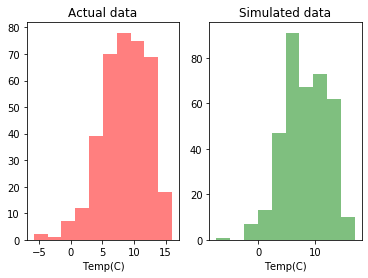

In [63]:
#Create a list that we'll put our simulated data in
fill=0
sim_maxtp=[fill,fill,fill,fill,fill,fill,fill,fill,fill,fill,fill,fill]

# Count how many values we have
num=len(mx[11]['maxtp'])

# Define our actual values as being for December 'maxtp' 
actual_values = mx[11]['maxtp']

# Generate a KDE from the empirical sample
sample_pdf = scipy.stats.gaussian_kde(actual_values)

# Generate a random sample from the KDE
sim_maxtp[11] = sample_pdf.resample(num).T[:,0]

# Plot two histograms side by side
fig, ax = plt.subplots(1,2)
ax[0].hist(mx[11]['maxtp'], alpha = 0.5, color = 'r')
ax[0].set_title('Actual data')
ax[0].set_xlabel('Temp(C)')
ax[1].hist(sim_maxtp[11], alpha = 0.5, color = 'g')
ax[1].set_title('Simulated data')
ax[1].set_xlabel('Temp(C)')
plt.show()

This gives us the same basic shape for the data. We'll use this method to generate our simulated data for the rest of the months that are not Normal (Jan, Mar, May, Jul, Aug, Sep, Oct, Nov), and numpy.random for those that are according to the Shapiro-Wilk test above (Feb, Apr and Jun).  
Start with the non-Normal months, using the method above for December:

In [84]:
for i in nonnorm:
   num=len(mx[i]['maxtp'])
   actual_values = mx[i]['maxtp']
   sample_pdf = scipy.stats.gaussian_kde(actual_values)
   sim_maxtp[i] = sample_pdf.resample(num).T[:,0]

Get the mean and standard deviation for Feb, Apr and Jun, so we can generate the random simulated data using numpy.random.  
(ref https://www.geeksforgeeks.org/python-pandas-dataframe-mean/)

In [85]:
fill=0
means=[fill,fill,fill,fill,fill,fill,fill,fill,fill,fill,fill,fill]
stds =[fill,fill,fill,fill,fill,fill,fill,fill,fill,fill,fill,fill]
for i in norm:
   means[i]=(mx[i]['maxtp'].mean())
   stds[i] =(mx[i]['maxtp'].std())

Generate random values for Feb and check the histograms of actual and generated data:

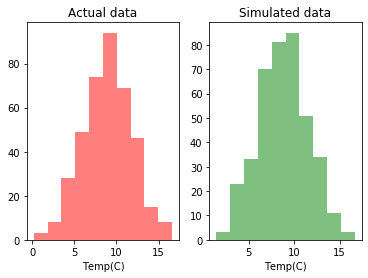

In [72]:
num=len(mx[1]['maxtp'])
sim_maxtp[1]=np.random.normal(means[1],stds[1],num)
fig, ax = plt.subplots(1,2)
ax[0].hist(mx[1]['maxtp'], alpha = 0.5, color = 'r')
ax[0].set_title('Actual data')
ax[0].set_xlabel('Temp(C)')
ax[1].hist(sim_maxtp[1], alpha = 0.5, color = 'g')
ax[1].set_title('Simulated data')
ax[1].set_xlabel('Temp(C)')
plt.show()


The histograms match well, so generate data for the other two months :

In [61]:
num=len(mx[3]['maxtp'])
sim_maxtp[3]=np.random.normal(means[3],stds[3],num)
num=len(mx[5]['maxtp'])
sim_maxtp[5]=np.random.normal(means[5],stds[5],num)

We now have our simulated data for 'maxtp'. Go through the same steps for 'mintp':

In [86]:
# Check for Normal distribution
i=0
norm=[]
nonnorm=[]
for i in range(12):
    stat, p = shapiro(mx[i]['mintp'])
    alpha = 0.05
    if p > alpha:
        print(months[i], " 'mintp' - sample looks Normal")
        norm.append(i)
    else:
        print(months[i], " 'mintp' - sample does not look Normal")
        nonnorm.append(i)
    i+=1 

Jan  'mintp' - sample looks Normal
Feb  'mintp' - sample does not look Normal
Mar  'mintp' - sample looks Normal
Apr  'mintp' - sample looks Normal
May  'mintp' - sample does not look Normal
Jun  'mintp' - sample looks Normal
Jul  'mintp' - sample does not look Normal
Aug  'mintp' - sample looks Normal
Sep  'mintp' - sample does not look Normal
Oct  'mintp' - sample looks Normal
Nov  'mintp' - sample looks Normal
Dec  'mintp' - sample does not look Normal


We see Jan, Mar, Apr, Jun, Aug, Oct and Nov have Normally distributed data, with the remainder being non-Normal.

In [73]:
fill=0
sim_mintp=[fill,fill,fill,fill,fill,fill,fill,fill,fill,fill,fill,fill]
for i in nonnorm:
   num=len(mx[i]['mintp'])
   actual_values = mx[i]['mintp']
   sample_pdf = scipy.stats.gaussian_kde(actual_values)
   sim_mintp[i] = sample_pdf.resample(num).T[:,0]


In [74]:
fill=0
means=[fill,fill,fill,fill,fill,fill,fill,fill,fill,fill,fill,fill]
stds =[fill,fill,fill,fill,fill,fill,fill,fill,fill,fill,fill,fill]
for i in norm:
   means[i]=(mx[i]['mintp'].mean())
   stds[i] =(mx[i]['mintp'].std())

Take a look at what the 'cbl' (pressure) data is like, using histograms, as for 'maxtp':

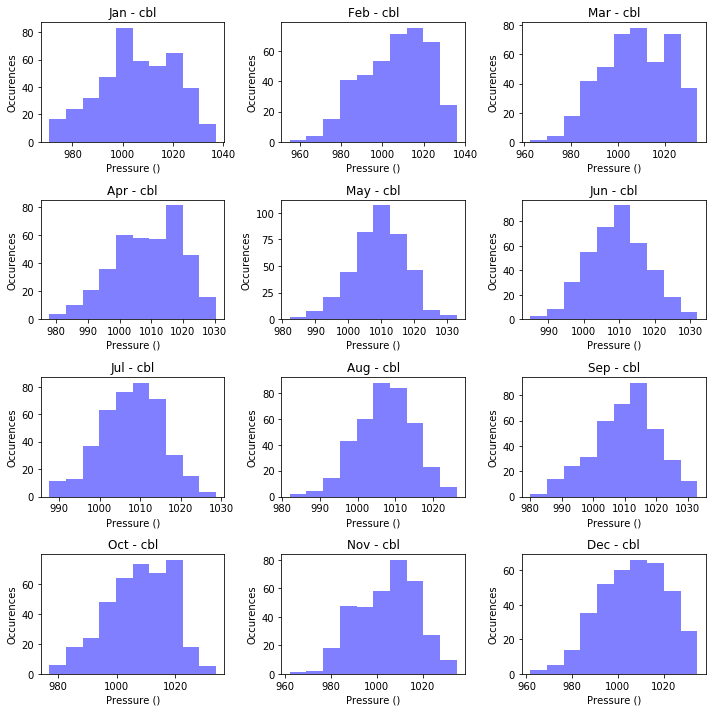

In [75]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(10, 10))
i = 0
for i1 in range(4):
    for i2 in range(3):
        ax = axes[i1][i2]
        ax.hist(mx[i]['cbl'], bins=10, color='blue', alpha=0.5)
        ax.set_xlabel('Pressure ()')
        ax.set_title(months[i] + " - cbl")
        ax.set_ylabel('Occurences')
        i+= 1

plt.tight_layout()
plt.show()

Like for temperature, the data for some of the months looks like it might be Normally distributed, and for others it clearly isn't. Go through the same steps of the Shapiro-Wilks test, then creating simulated data using numpy.random and the KDE.

In [87]:
i=0
norm=[]
nonnorm=[]
for i in range(12):
    stat, p = shapiro(mx[i]['cbl'])
    alpha = 0.05
    if p > alpha:
        print(months[i], " 'cbl' - sample looks Normal")
        norm.append(i)
    else:
        print(months[i], " 'cbl' - sample does not look Normal")
        nonnorm.append(i)
    i+=1 

Jan  'cbl' - sample does not look Normal
Feb  'cbl' - sample does not look Normal
Mar  'cbl' - sample does not look Normal
Apr  'cbl' - sample does not look Normal
May  'cbl' - sample looks Normal
Jun  'cbl' - sample looks Normal
Jul  'cbl' - sample looks Normal
Aug  'cbl' - sample looks Normal
Sep  'cbl' - sample does not look Normal
Oct  'cbl' - sample does not look Normal
Nov  'cbl' - sample does not look Normal
Dec  'cbl' - sample does not look Normal
[4, 5, 6, 7]
[0, 1, 2, 3, 8, 9, 10, 11]


In [ ]:
fill=0
sim_mintp=[fill,fill,fill,fill,fill,fill,fill,fill,fill,fill,fill,fill]
nonnorm=[1,4,6,8,11]
for i in nonnorm:
   num=len(mx[i]['mintp'])
   actual_values = mx[i]['mintp']
   sample_pdf = scipy.stats.gaussian_kde(actual_values)
   sim_mintp[i] = sample_pdf.resample(num).T[:,0]